https://wolfscie.wordpress.com/2017/10/05/visualizing-wrf-domain/

In [1]:
ds3.close()

NameError: name 'ds3' is not defined

In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
ds1 = Dataset('geo_em.d01.nc')
ds2 = Dataset('geo_em.d02.nc')
ds3 = Dataset('geo_em.d03.nc')

In [3]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
#ds1 = Dataset('D:/exp2_201303_sodar/gfs_pbl1_d3_20130301.nc')
#ds2 = Dataset('D:/exp2_201303_sodar/gfs_pbl1_d2_20130301.nc')
ds3 = Dataset('D:/exp2_201303_sodar/gfs_pbl1_d3_20130301.nc')

In [4]:
ds3.variables.keys()

odict_keys(['Times', 'XLAT', 'XLONG', 'LU_INDEX', 'ZNU', 'ZNW', 'ZS', 'DZS', 'VAR_SSO', 'U', 'V', 'W', 'PH', 'PHB', 'T', 'HFX_FORCE', 'LH_FORCE', 'TSK_FORCE', 'HFX_FORCE_TEND', 'LH_FORCE_TEND', 'TSK_FORCE_TEND', 'MU', 'MUB', 'NEST_POS', 'P', 'PB', 'FNM', 'FNP', 'RDNW', 'RDN', 'DNW', 'DN', 'CFN', 'CFN1', 'THIS_IS_AN_IDEAL_RUN', 'P_HYD', 'Q2', 'T2', 'TH2', 'PSFC', 'U10', 'V10', 'RDX', 'RDY', 'RESM', 'ZETATOP', 'CF1', 'CF2', 'CF3', 'ITIMESTEP', 'XTIME', 'QVAPOR', 'QCLOUD', 'QRAIN', 'SHDMAX', 'SHDMIN', 'SNOALB', 'TSLB', 'SMOIS', 'SH2O', 'SMCREL', 'SEAICE', 'XICEM', 'SFROFF', 'UDROFF', 'IVGTYP', 'ISLTYP', 'VEGFRA', 'GRDFLX', 'ACGRDFLX', 'ACSNOM', 'SNOW', 'SNOWH', 'CANWAT', 'SSTSK', 'COSZEN', 'LAI', 'DTAUX3D', 'DTAUY3D', 'DUSFCG', 'DVSFCG', 'VAR', 'CON', 'OA1', 'OA2', 'OA3', 'OA4', 'OL1', 'OL2', 'OL3', 'OL4', 'MAPFAC_M', 'MAPFAC_U', 'MAPFAC_V', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_VX', 'MF_VX_INV', 'MAPFAC_VY', 'F', 'E', 'SINALPHA', 'COSALPHA', 'HGT', 'TSK', 'P_TOP', '

<class 'netCDF4._netCDF4.Variable'>
float32 PSFC(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: SFC PRESSURE
    units: Pa
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (331, 129, 90)
filling on, default _FillValue of 9.969209968386869e+36 used



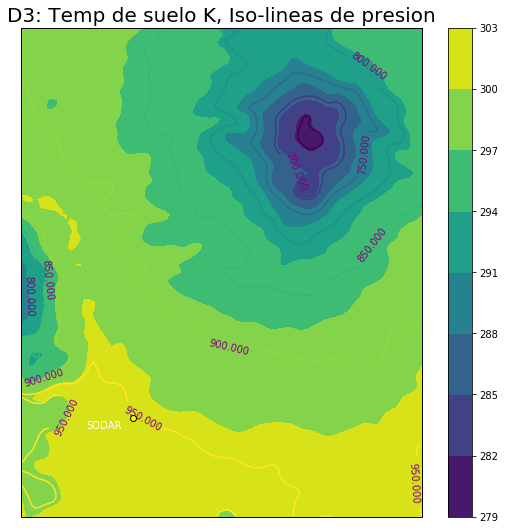

In [5]:
print(ds3.variables['PSFC'])
#plt.contourf(ds3.variables['SST'][0,:,:])
data = ds3.variables['SST'][0,:,:]
pres = ds3.variables['PSFC'][0,:,:]/100
lons = ds3.variables['XLONG'][0,:,:]
lats = ds3.variables['XLAT'][0,:,:]

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
data_crs = ccrs.LambertConformal
# The projection keyword determines how the plot will look
plt.figure(figsize=(9, 9))
ax = plt.axes(projection=data_crs())
ax.coastlines()
# set a margin around the data
ax.set_xmargin(0.5)
ax.set_ymargin(0.5)
# TITLE AND LABELS
ax.set_title('D3: Temp de suelo K, Iso-lineas de presion', size=20)
slon, slat = -103.7745, 19.2792
ax.scatter(slon, slat, color='yellow', edgecolors='black', zorder=10)
plt.text(slon - .01, slat - .01, 'SODAR', horizontalalignment='right', color='white')
#ax.set_xticks(lons[::10])
#ax.set_yticks(lats[::10])
templot = ax.contourf(lons, lats, data)
CS = ax.contour(lons, lats, pres)
plt.clabel(CS, inline=1, fontsize=10, colors='purple')
cb1 = plt.colorbar(templot)

ax.set_aspect('auto')


In [6]:
ter = ds3.variables['SST']
ter

<class 'netCDF4._netCDF4.Variable'>
float32 SST(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: SEA SURFACE TEMPERATURE
    units: K
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (331, 129, 90)
filling on, default _FillValue of 9.969209968386869e+36 used

(428, 614) (614,) (428,)


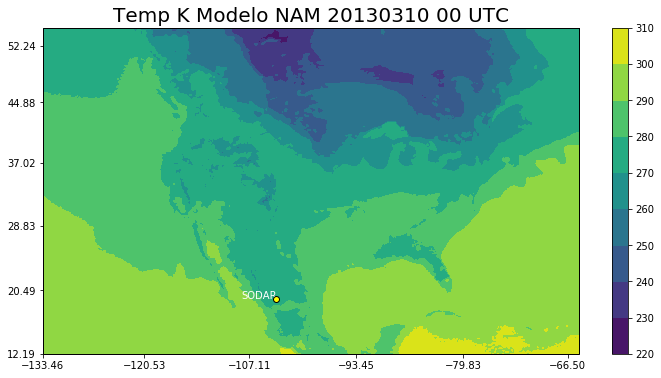

In [7]:
import numpy as np
import pandas as pd
lats = pd.read_pickle('namlat.pk') 
lons = pd.read_pickle('namlon.pk') 
data = pd.read_pickle('namtemp.pk') 

lons = lons.iloc[0,:]
lats = lats.iloc[:,0]
print(data.shape, lons.shape, lats.shape)

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
data_crs = ccrs.LambertConformal
# The projection keyword determines how the plot will look
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=data_crs())
ax.coastlines()
# set a margin around the data
ax.set_xmargin(0.5)
ax.set_ymargin(0.5)
# TITLE AND LABELS
ax.set_title('Temp K Modelo NAM 20130310 00 UTC', size=20)
slon, slat = -103.7745, 19.2792
ax.scatter(slon, slat, color='yellow', edgecolors='black', zorder=10)
plt.text(slon + .2, slat + .05, 'SODAR', horizontalalignment='right', color='white')
ax.set_xticks(lons[::120])
ax.set_yticks(lats[::80])
templot = ax.contourf(lons, lats, data)
cb1 = plt.colorbar(templot)
ax.set_aspect('auto')

plt.show()

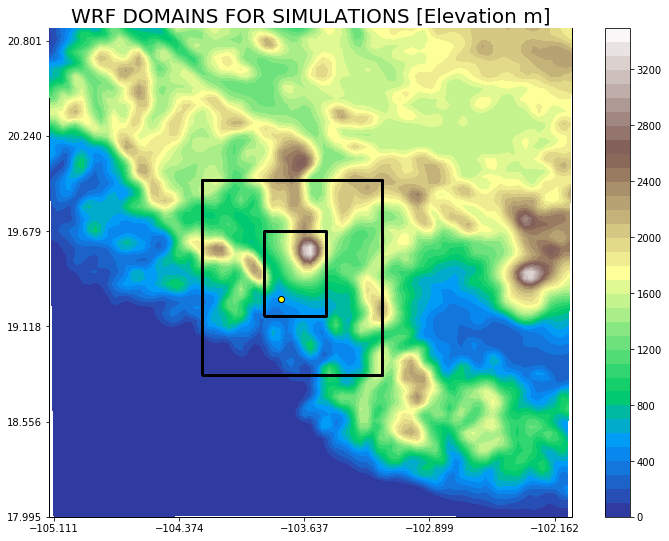

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry.polygon import LinearRing
from netCDF4 import Dataset
from wrf import to_np, getvar, get_cartopy, geo_bounds
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import cartopy.feature as cfeature

# Get the cartopy mapping object from the netcdf file
cart_proj = get_cartopy(wrfin=ds1)
fig = plt.figure(figsize=(12,9))
ax = plt.axes(projection=cart_proj)

dataset = ds1
ter = dataset.variables['HGT_M'][0, :, :]
lats = dataset.variables['XLAT_M'][0, :]
lons = dataset.variables['XLONG_M'][0, :]
#x,y = np.meshgrid(lons[0,:],lats[:,0])
x,y = lons,lats

# contour levels
# contour plot and labels
vmin, vmax = 0, 3501
clevs = np.arange(vmin,vmax,100)
cbar = ax.contourf(x, y, ter, clevs, vmin=vmin, vmax=vmax, transform=cart_proj, cmap='terrain', zorder=5)
plt.colorbar(cbar)

# d02 box
bounds = geo_bounds(wrfin=ds2)
lons = [bounds.bottom_left.lon, bounds.bottom_left.lon, bounds.top_right.lon, bounds.top_right.lon]
lats = [bounds.bottom_left.lat, bounds.top_right.lat, bounds.top_right.lat, bounds.bottom_left.lat]
ring = LinearRing(list(zip(lons, lats)))
ax.add_geometries([ring], cart_proj, facecolor='none', lw=3, edgecolor='black', zorder=5)
elev = LinearRing(list(zip(lons, lats)))
ax.add_geometries([elev], cart_proj, facecolor='none', lw=3, edgecolor='black', zorder=5)

# d03 box
bounds = geo_bounds(wrfin=ds3)
lons = [bounds.bottom_left.lon, bounds.bottom_left.lon, bounds.top_right.lon, bounds.top_right.lon]
lats = [bounds.bottom_left.lat, bounds.top_right.lat, bounds.top_right.lat, bounds.bottom_left.lat]
ring = LinearRing(list(zip(lons, lats)))
ax.add_geometries([ring], cart_proj, facecolor='none', lw=3, edgecolor='black', zorder=5)

# TITLE AND LABELS
ax.set_title('WRF DOMAINS FOR SIMULATIONS [Elevation m]', size=20)
slon, slat = -103.7745, 19.2792
ax.scatter(slon, slat, color='yellow', edgecolors='black', zorder=10)
plt.text(slon + .2, slat + .05, 'SODAR', horizontalalignment='right', color='white', transform=cart_proj)
# Lat 19.2792° y long -103.7745
ax.set_xticks(x[0,::20])
ax.set_yticks(y[::16,0])

plt.show()

In [9]:
ds3.variables['XLONG_M']

KeyError: 'XLONG_M'

In [51]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry.polygon import LinearRing

#dataset = Dataset('../../../../WPS/geo_em.d01.nc', 'r')
dataset = Dataset('../../../../wrfout_d01_2013-03-01_00:00:00', 'r')
ter = dataset.variables['HGT'][0, :, :]
lats = dataset.variables['XLAT'][0, :]
lons = dataset.variables['XLONG'][0, :]
x,y = np.meshgrid(lons[0,:],lats[:,0])


ax = plt.axes(projection=ccrs.LambertConformal())
ax.coastlines()
ax.contour(x, y, ter)
ax.pcolormesh(x, y, ter, cmap='terrain')
ax.scatter(-103.6, 19.33, color='red', edgecolors='black')

# Draw a rectangle inside
#lons = [x.min()+.5, x.min()+.5, x.max()-.5, x.max()-.5]
#lats = [y.min()+.5, y.max()-.5, y.max()-.5, y.min()+.5]
#ring = LinearRing(list(zip(lons, lats)))
#ax.add_geometries([ring], ccrs.LambertConformal(), facecolor='none', lw=3, edgecolor='black')
ax.set_title('DOMINIO 1 ELEV', size=20)

plt.show()

OSError: [Errno 22] Invalid argument: b'../../../../wrfout_d01_2013-03-01_00:00:00'

In [52]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry.polygon import LinearRing

#dataset = Dataset('../../../../WPS/geo_em.d02.nc', 'r')
dataset = Dataset('../../../../wrfout_d02_2013-03-01_00:00:00', 'r')
#dataset = Dataset('../../../../exp_201303_sodar/gfs_les_d2_20130301.nc', 'r')

ter = dataset.variables['HGT'][0, :, :]
lats = dataset.variables['XLAT'][0, :]
lons = dataset.variables['XLONG'][0, :]
x,y = np.meshgrid(lons[0,:],lats[:,0])

ax = plt.axes(projection=ccrs.LambertConformal())
ax.coastlines()
ax.contour(x, y, ter)
ax.pcolormesh(x, y, ter, cmap='terrain')
ax.scatter(-103.6, 19.33, color='yellow', edgecolors='black')

# Draw a rectangle inside
#lons = [x.min()+.5, x.min()+.5, x.max()-.5, x.max()-.5]
#lats = [y.min()+.5, y.max()-.5, y.max()-.5, y.min()+.5]
#ring = LinearRing(list(zip(lons, lats)))
#ax.add_geometries([ring], ccrs.LambertConformal(), facecolor='none', lw=3, edgecolor='black')
ax.set_title('DOMINIO 2 ELEV', size=20)

plt.show()

OSError: [Errno 22] Invalid argument: b'../../../../wrfout_d02_2013-03-01_00:00:00'

In [53]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry.polygon import LinearRing

#dataset = Dataset('../../../../WPS/geo_em.d03.nc', 'r')
dataset = Dataset('../../../../wrfout_d03_2013-03-01_00:00:00', 'r')
#dataset = Dataset('../../../../exp_201303_sodar/gfs_les_d3_20130301.nc', 'r')

ter = dataset.variables['HGT'][0, :, :]
lats = dataset.variables['XLAT'][0, :]
lons = dataset.variables['XLONG'][0, :]
x,y = np.meshgrid(lons[0,:],lats[:,0])

ax = plt.axes(projection=ccrs.LambertConformal())
ax.coastlines()
ax.contour(x, y, ter)
ax.scatter(-103.6, 19.33, color='yellow', edgecolors='black')

im3 = ax.pcolormesh(x, y, ter, cmap='terrain')
cb3 = plt.colorbar(im3)
ax.set_xticks(x[0,::44])
ax.set_yticks(y[::16,0])

# Draw a point
ax.scatter(-103.6, 19.33, color='yellow', edgecolors='black', label='sodar')

ax.set_title('DOMINIO 3 ELEV', size=20)

plt.show()

OSError: [Errno 22] Invalid argument: b'../../../../wrfout_d03_2013-03-01_00:00:00'

In [54]:
y[::32,0]

array([17.995338, 19.117683, 20.240128], dtype=float32)

In [55]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry.polygon import LinearRing

dataset = Dataset('30s_geo_em.d01.nc', 'r')
var = dataset.variables['LANDUSEF'][0, 1, :, :]
lats = dataset.variables['XLAT_M'][0, :]
lons = dataset.variables['XLONG_M'][0, :]
x,y = np.meshgrid(lons[0,:],lats[:,0])


ax = plt.axes(projection=ccrs.LambertConformal())
ax.coastlines()
ax.contour(x, y, var)
ax.pcolormesh(x, y, var, cmap='terrain')

# Draw a rectangle inside
ax.scatter(-103.6, 19.33, color='black', label='sodar')

ax.set_title('DOMINIO 3 LANDUSE', size=20)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: b'30s_geo_em.d01.nc'

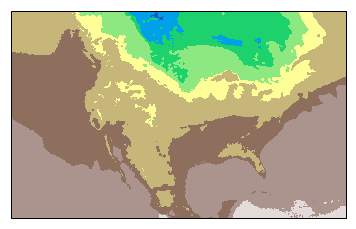

In [56]:
import numpy as np
import pandas as pd
lats = pd.read_pickle('namlat.pk').iloc[:,0]
lons = pd.read_pickle('namlon.pk').iloc[0,:]
data = pd.read_pickle('namtemp.pk') 
ax = plt.axes(projection=cart_proj)
ax.contourf(lons, lats, data, transform=cart_proj, cmap='terrain', zorder=1)  # didn't use transform, but looks ok...

plt.show()

C:\Users\ssrel\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


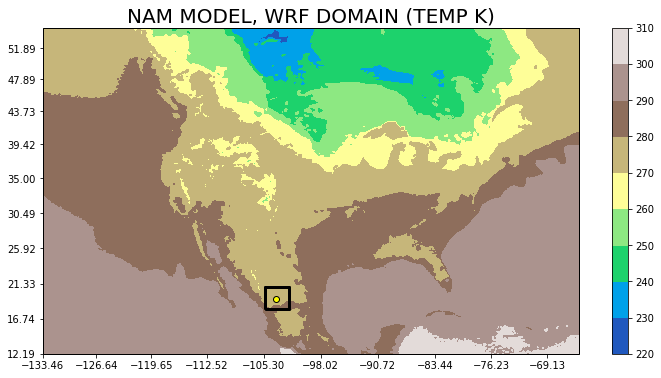

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry.polygon import LinearRing
from netCDF4 import Dataset
from wrf import to_np, getvar, get_cartopy, geo_bounds
import cartopy.crs as ccrs

# Get the cartopy mapping object from the netcdf file
cart_proj = get_cartopy(wrfin=ds1)
fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=cart_proj)
#ax.coastlines('50m', linewidth=0.8)

nlat = pd.read_pickle('namlat.pk').iloc[:,0]
nlon = pd.read_pickle('namlon.pk').iloc[0,:]
data = pd.read_pickle('namtemp.pk') 
ax = plt.axes(projection=cart_proj)
imnam = ax.contourf(nlon, nlat, data, transform=cart_proj, cmap='terrain', zorder=1)
cb = plt.colorbar(imnam)

# d01 box
bounds = geo_bounds(wrfin=ds1)
lons = [bounds.bottom_left.lon, bounds.bottom_left.lon, bounds.top_right.lon, bounds.top_right.lon]
lats = [bounds.bottom_left.lat, bounds.top_right.lat, bounds.top_right.lat, bounds.bottom_left.lat]
ring = LinearRing(list(zip(lons, lats)))
ax.add_geometries([ring], cart_proj, facecolor='none', lw=3, edgecolor='black', zorder=5)
elev = LinearRing(list(zip(lons, lats)))
ax.add_geometries([elev], cart_proj, facecolor='none', lw=3, edgecolor='black', zorder=5)

# TITLE AND LABELS
ax.set_title('NAM MODEL, WRF DOMAIN (TEMP K)', size=20)
slon, slat = -103.7745, 19.2792
ax.scatter(slon, slat, color='yellow', edgecolors='black', zorder=10)
#plt.text(slon - 2, slat - 0.7, 'SODAR D01', horizontalalignment='right', color='white', transform=cart_proj)
# Lat 19.2792° y long -103.7745

ax.set_xticks(nlon[::64])
ax.set_yticks(nlat[::44])
ax.set_aspect('auto')

plt.show()

In [58]:
print(nlon.size, nlat.size)

614 428
